# Experiment 5: Plotting robustness evaluation

In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
RESULT_FILE = "../results/results_2025-04-07_15-30-08.json"

with open(RESULT_FILE) as f:
    data = json.load(f)

print(data)

{'metrics': {}, 'contrast_inc': {'1.0': {'dice': {'0': 0.9273252418624479, '1': 0.23015401600126573, '2': 0.517260092821719}}, '1.01': {'dice': {'0': 0.9272952421362856, '1': 0.22991157426735026, '2': 0.5173317297546838}}, '1.02': {'dice': {'0': 0.9272494720190353, '1': 0.22978420846115655, '2': 0.5173581896012853}}, '1.03': {'dice': {'0': 0.9271994068925321, '1': 0.2295202320577848, '2': 0.5173594836042605}}, '1.04': {'dice': {'0': 0.9271336520938546, '1': 0.22932053975167907, '2': 0.517328574901362}}, '1.05': {'dice': {'0': 0.9270624359490718, '1': 0.22892509993694884, '2': 0.5172550994000659}}, '1.1': {'dice': {'0': 0.9264184192690142, '1': 0.22785084155710775, '2': 0.5161105717937156}}, '1.15': {'dice': {'0': 0.9253743279081721, '1': 0.22612167167753844, '2': 0.5142801084225771}}, '1.2': {'dice': {'0': 0.9240598075690937, '1': 0.2242329859130467, '2': 0.5117478032551015}}, '1.25': {'dice': {'0': 0.9226245267224984, '1': 0.2216824577671809, '2': 0.5080513198211084}}}, 'contrast_dec'

In [3]:
def format_title(key):
    return key.replace("_", " ").title()

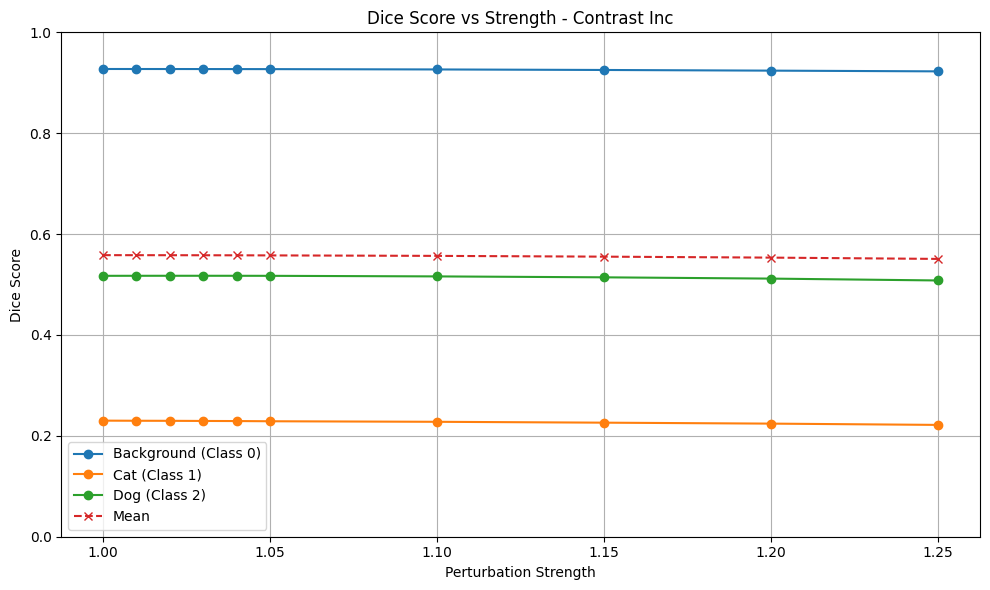

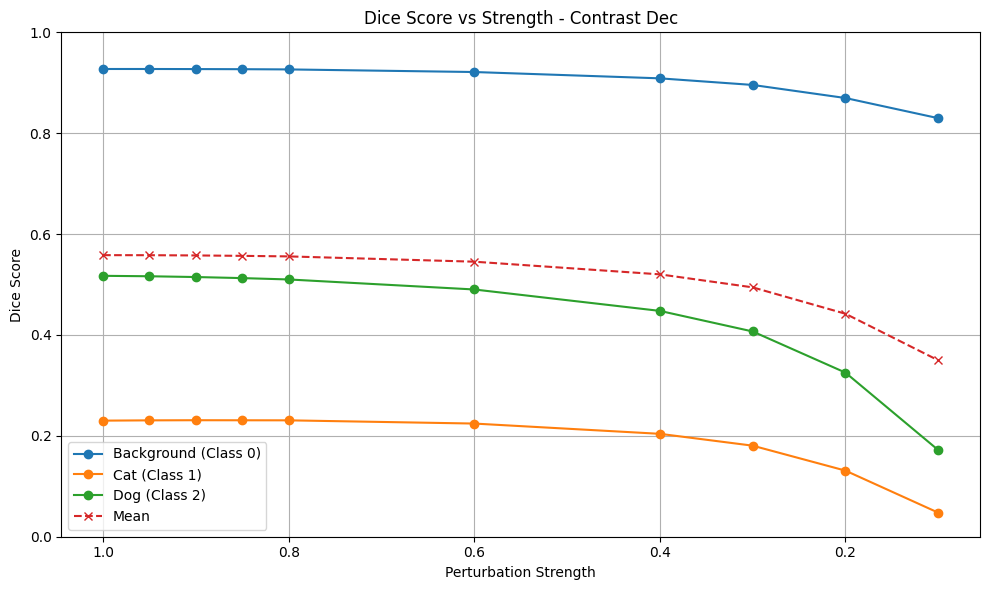

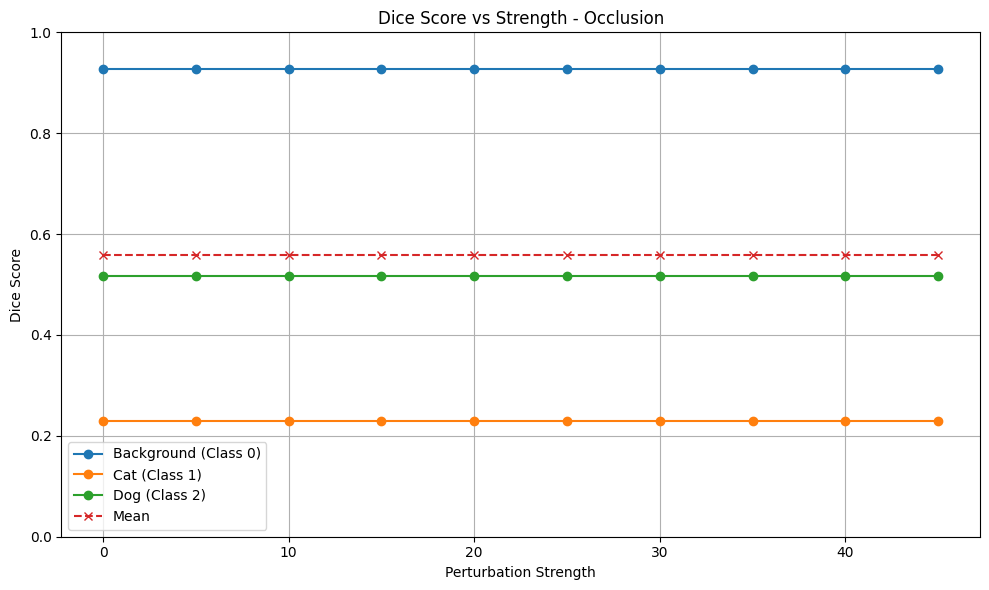

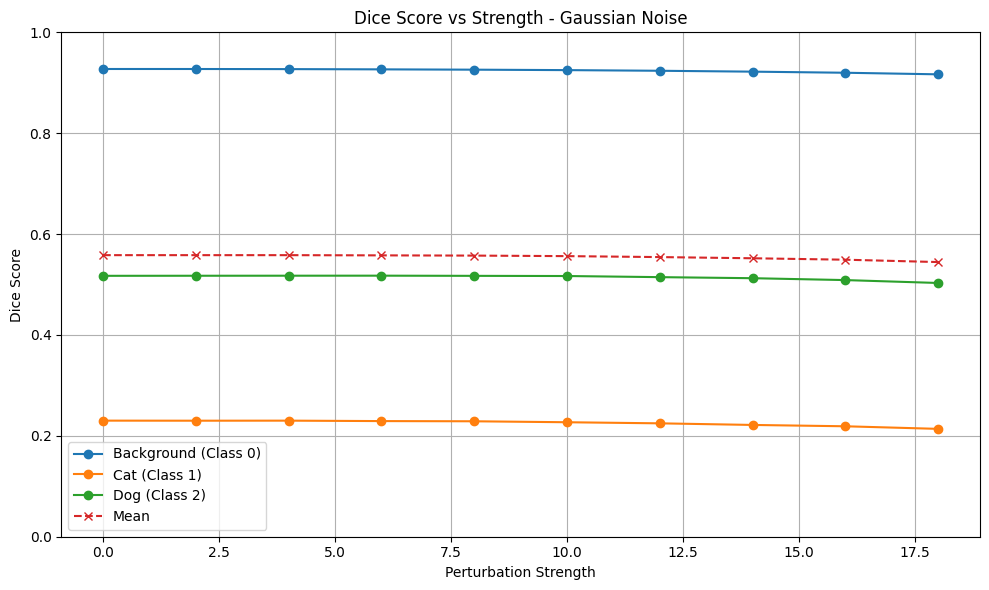

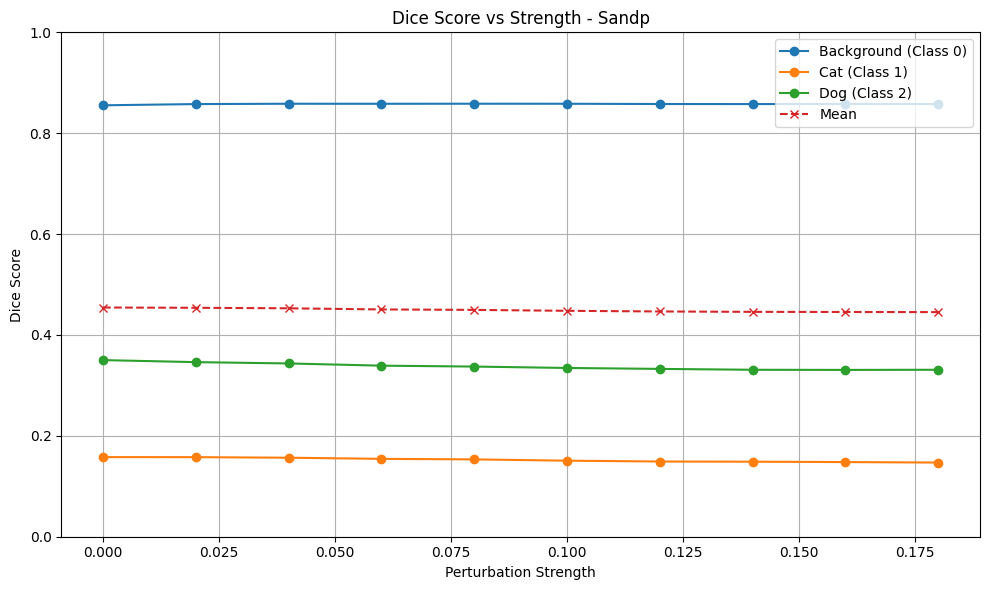

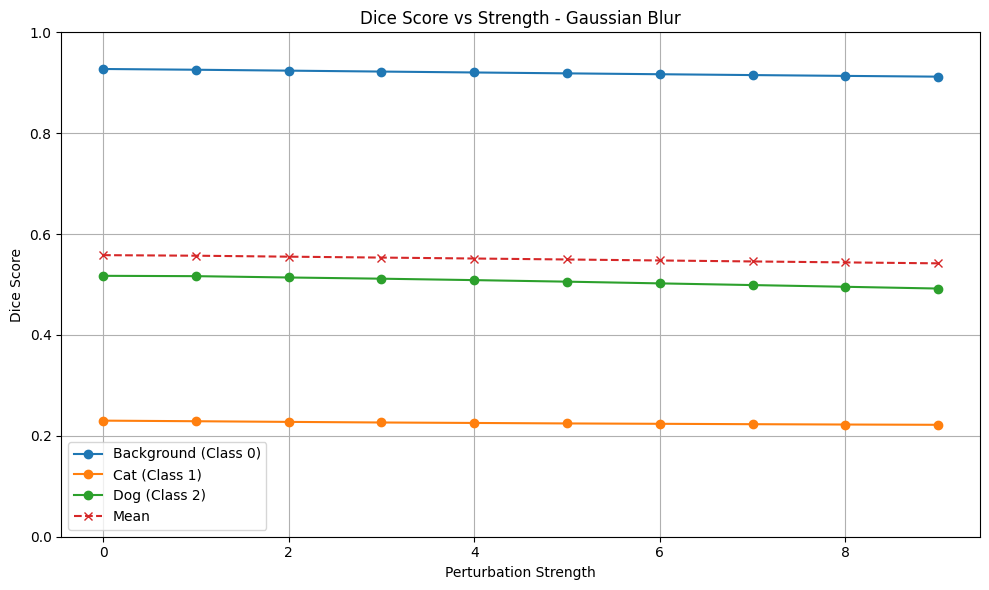

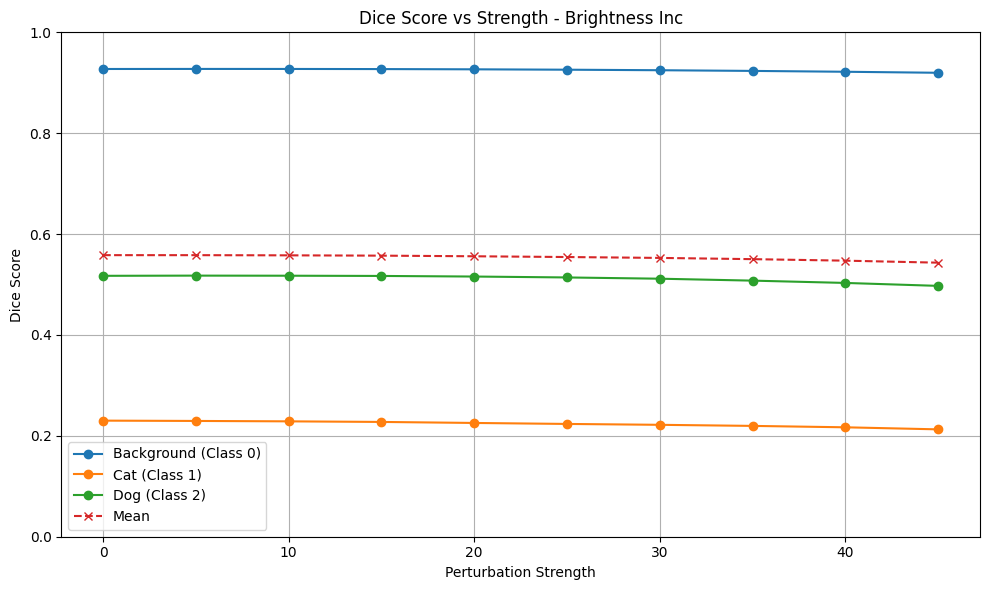

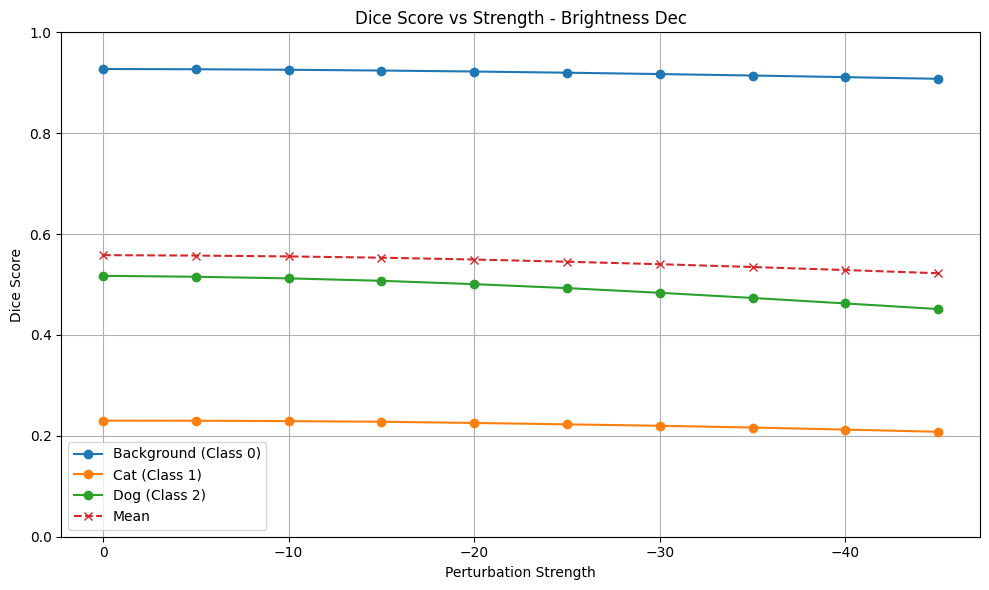

In [4]:
for perturbation, strength_dict in data.items():
    if perturbation == "metrics" or not strength_dict:
        continue

    reverse = "dec" in perturbation

    strength_vals = []
    background_scores = []
    cat_scores = []
    dog_scores = []
    mean_scores = []

    for strength, metrics in strength_dict.items():
        dice = metrics["dice"]
        try:
            strength_float = float(strength)
        except ValueError:
            continue  # Skip non-numeric keys if any
        strength_vals.append(strength_float)
        background_scores.append(dice.get("0", 0))
        cat_scores.append(dice.get("1", 0))
        dog_scores.append(dice.get("2", 0))
        mean = sum(dice.get(cls, 0) for cls in ["0", "1", "2"]) / 3
        mean_scores.append(mean)

    # Sort by float strength
    sorted_data = sorted(zip(strength_vals, background_scores, cat_scores, dog_scores, mean_scores),
                         key=lambda x: x[0], reverse=reverse)
    strengths, background_scores, cat_scores, dog_scores, mean_scores = zip(*sorted_data)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(strengths, background_scores, label="Background (Class 0)", marker='o')
    plt.plot(strengths, cat_scores, label="Cat (Class 1)", marker='o')
    plt.plot(strengths, dog_scores, label="Dog (Class 2)", marker='o')
    plt.plot(strengths, mean_scores, label="Mean", linestyle='--', marker='x')

    plt.title(f"Dice Score vs Strength - {format_title(perturbation)}")
    plt.xlabel("Perturbation Strength")
    plt.ylabel("Dice Score")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Only invert x-axis if it's a decreasing perturbation
    if "dec" in perturbation:
        plt.gca().invert_xaxis()
    plt.show()